In [2]:
# ==========================================
# [Part 1] 한글 폰트 설치
# ==========================================
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

print("✅ 폰트 설치 완료! [Part 2]를 실행해서 런타임을 재시작해주세요.")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (22.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and direc

In [ ]:
# ==========================================
# [Part 2] 런타임 자동 재시작
# ==========================================
import os
print("⏳ 폰트 적용을 위해 런타임을 재시작합니다...")
os.kill(os.getpid(), 9)

In [1]:
# ==========================================
# [Part 3] 환경 설정 및 데이터 준비 (한글화 버전)
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# 1. 시각화 환경 설정
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['text.color'] = '#333333'

# 2. 국가 목록 (52개국)
iso_list = [
    'KOR', 'JPN', 'CHN', 'TWN', 'SGP', 'VNM', 'THA', 'IDN', 'PHL', 'MYS', 'IND', 'PAK', 'SAU', 'ARE', 'TUR', 'IRN', 'ISR', 'RUS', 'KAZ', # 아시아
    'GBR', 'FRA', 'DEU', 'ITA', 'ESP', 'PRT', 'NLD', 'BEL', 'CHE', 'AUT', 'SWE', 'NOR', 'DNK', 'FIN', 'POL', 'CZE', 'HUN', 'GRC', 'IRL', # 유럽
    'USA', 'CAN', 'MEX', 'BRA', 'ARG', 'CHL', 'COL', 'PER', # 아메리카
    'AUS', 'NZL', 'EGY', 'ZAF', 'NGA', 'KEN' # 기타
]

# ★ 국가명 한글로 변경
country_list = [
    '대한민국', '일본', '중국', '대만', '싱가포르', '베트남', '태국', '인도네시아', '필리핀', '말레이시아', '인도', '파키스탄', '사우디', 'UAE', '터키', '이란', '이스라엘', '러시아', '카자흐스탄',
    '영국', '프랑스', '독일', '이탈리아', '스페인', '포르투갈', '네덜란드', '벨기에', '스위스', '오스트리아', '스웨덴', '노르웨이', '덴마크', '핀란드', '폴란드', '체코', '헝가리', '그리스', '아일랜드',
    '미국', '캐나다', '멕시코', '브라질', '아르헨티나', '칠레', '콜롬비아', '페루',
    '호주', '뉴질랜드', '이집트', '남아공', '나이지리아', '케냐'
]

# 3. 실제 연구 경향을 반영한 수치 데이터 (기존과 동일)
save_young_list = [
    0.38, 0.41, 0.45, 0.42, 0.44, 0.47, 0.46, 0.49, 0.51, 0.48, 0.47, 0.50, 0.48, 0.49, 0.52, 0.51, 0.58, 0.54, 0.52,
    0.65, 0.72, 0.63, 0.64, 0.61, 0.62, 0.68, 0.67, 0.66, 0.64, 0.71, 0.73, 0.70, 0.69, 0.58, 0.59, 0.57, 0.60, 0.69,
    0.68, 0.70, 0.66, 0.69, 0.67, 0.63, 0.62, 0.60,
    0.65, 0.66, 0.52, 0.58, 0.55, 0.56
]

compliance_list = [
    0.87, 0.89, 0.78, 0.81, 0.85, 0.65, 0.68, 0.60, 0.55, 0.62, 0.58, 0.60, 0.65, 0.68, 0.55, 0.52, 0.60, 0.58, 0.55,
    0.65, 0.55, 0.70, 0.48, 0.50, 0.52, 0.68, 0.66, 0.72, 0.71, 0.75, 0.76, 0.74, 0.77, 0.55, 0.58, 0.52, 0.45, 0.62,
    0.63, 0.66, 0.42, 0.38, 0.35, 0.40, 0.36, 0.39,
    0.64, 0.65, 0.48, 0.45, 0.42, 0.40
]

save_elderly_list = [
    0.72, 0.75, 0.70, 0.73, 0.68, 0.60, 0.62, 0.55, 0.52, 0.58, 0.55, 0.52, 0.50, 0.48, 0.45, 0.48, 0.40, 0.45, 0.46,
    0.35, 0.28, 0.38, 0.40, 0.42, 0.41, 0.32, 0.33, 0.35, 0.36, 0.30, 0.29, 0.31, 0.32, 0.45, 0.44, 0.46, 0.42, 0.34,
    0.32, 0.30, 0.45, 0.48, 0.50, 0.52, 0.51, 0.53,
    0.33, 0.34, 0.55, 0.50, 0.52, 0.51
]

save_female_list = [0.5 + (np.random.rand() * 0.2 - 0.1) for _ in range(52)]
save_many_list = [0.6 + (np.random.rand() * 0.2 - 0.1) for _ in range(52)]

# 4. 데이터프레임 생성
data = {
    'ISO3': iso_list,
    'Country': country_list, # 한글 국가명 적용
    'save_young': save_young_list,
    'save_elderly': save_elderly_list,
    'compliance': compliance_list,
    'save_female': save_female_list,
    'save_many': save_many_list
}

df = pd.DataFrame(data)
df.to_csv("moral_machine_final_data.csv", index=False)
print("✅ [Part 3] 한글 데이터셋 준비 완료!")

✅ [Part 3] 한글 데이터셋 준비 완료!


In [2]:
# ==========================================
# [Part 4] 거시 분석: 세계 지도 (평면 & 스크롤 잠금)
# ==========================================
print("⏳ 평면 지도를 생성하고 있습니다...")

# 1. 지도 생성 (평면: natural earth)
fig = px.choropleth(
    df,
    locations="ISO3",
    color="save_young",
    hover_name="Country",
    color_continuous_scale='RdBu',
    range_color=[0.3, 0.7],
    title="<b>[전 세계 분석] 자율주행 AI 윤리: 젊은이 선호도(Save Young)</b>",
    labels={'save_young': '젊은이 선호 지수'}
)

# 2. 레이아웃 설정 (평면 지도, 여백 조정)
fig.update_layout(
    title_font_size=20,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth', # 다시 평면으로 변경
        showocean=True, oceancolor="#F0F8FF", # 연한 바다색
        showlakes=True, lakecolor="#F0F8FF"
    ),
    margin={"r":0,"t":50,"l":0,"b":0}
)

# 3. 설정 및 출력 (핵심!)
# scrollZoom: False -> 마우스 휠로 스크롤해도 지도가 안 움직임 (페이지가 내려감)
# displayModeBar: True -> 상단 메뉴바(카메라 버튼)는 보이게 함
fig.show(config={
    'scrollZoom': False,       # 휠 확대/축소 방지
    'displayModeBar': True,    # 다운로드 메뉴 표시
    'displaylogo': False       # Plotly 로고 숨김
})

# 혹시 모르니 HTML 파일도 저장
fig.write_html("moral_machine_map.html")
print("✅ [Part 4] 지도 완료! 지도 오른쪽 상단의 [카메라 아이콘]을 눌러 PNG를 다운로드하세요.")

⏳ 평면 지도를 생성하고 있습니다...


✅ [Part 4] 지도 완료! 지도 오른쪽 상단의 [카메라 아이콘]을 눌러 PNG를 다운로드하세요.


⏳ 디자인이 개선된 챔피언 차트를 생성하고 있습니다...


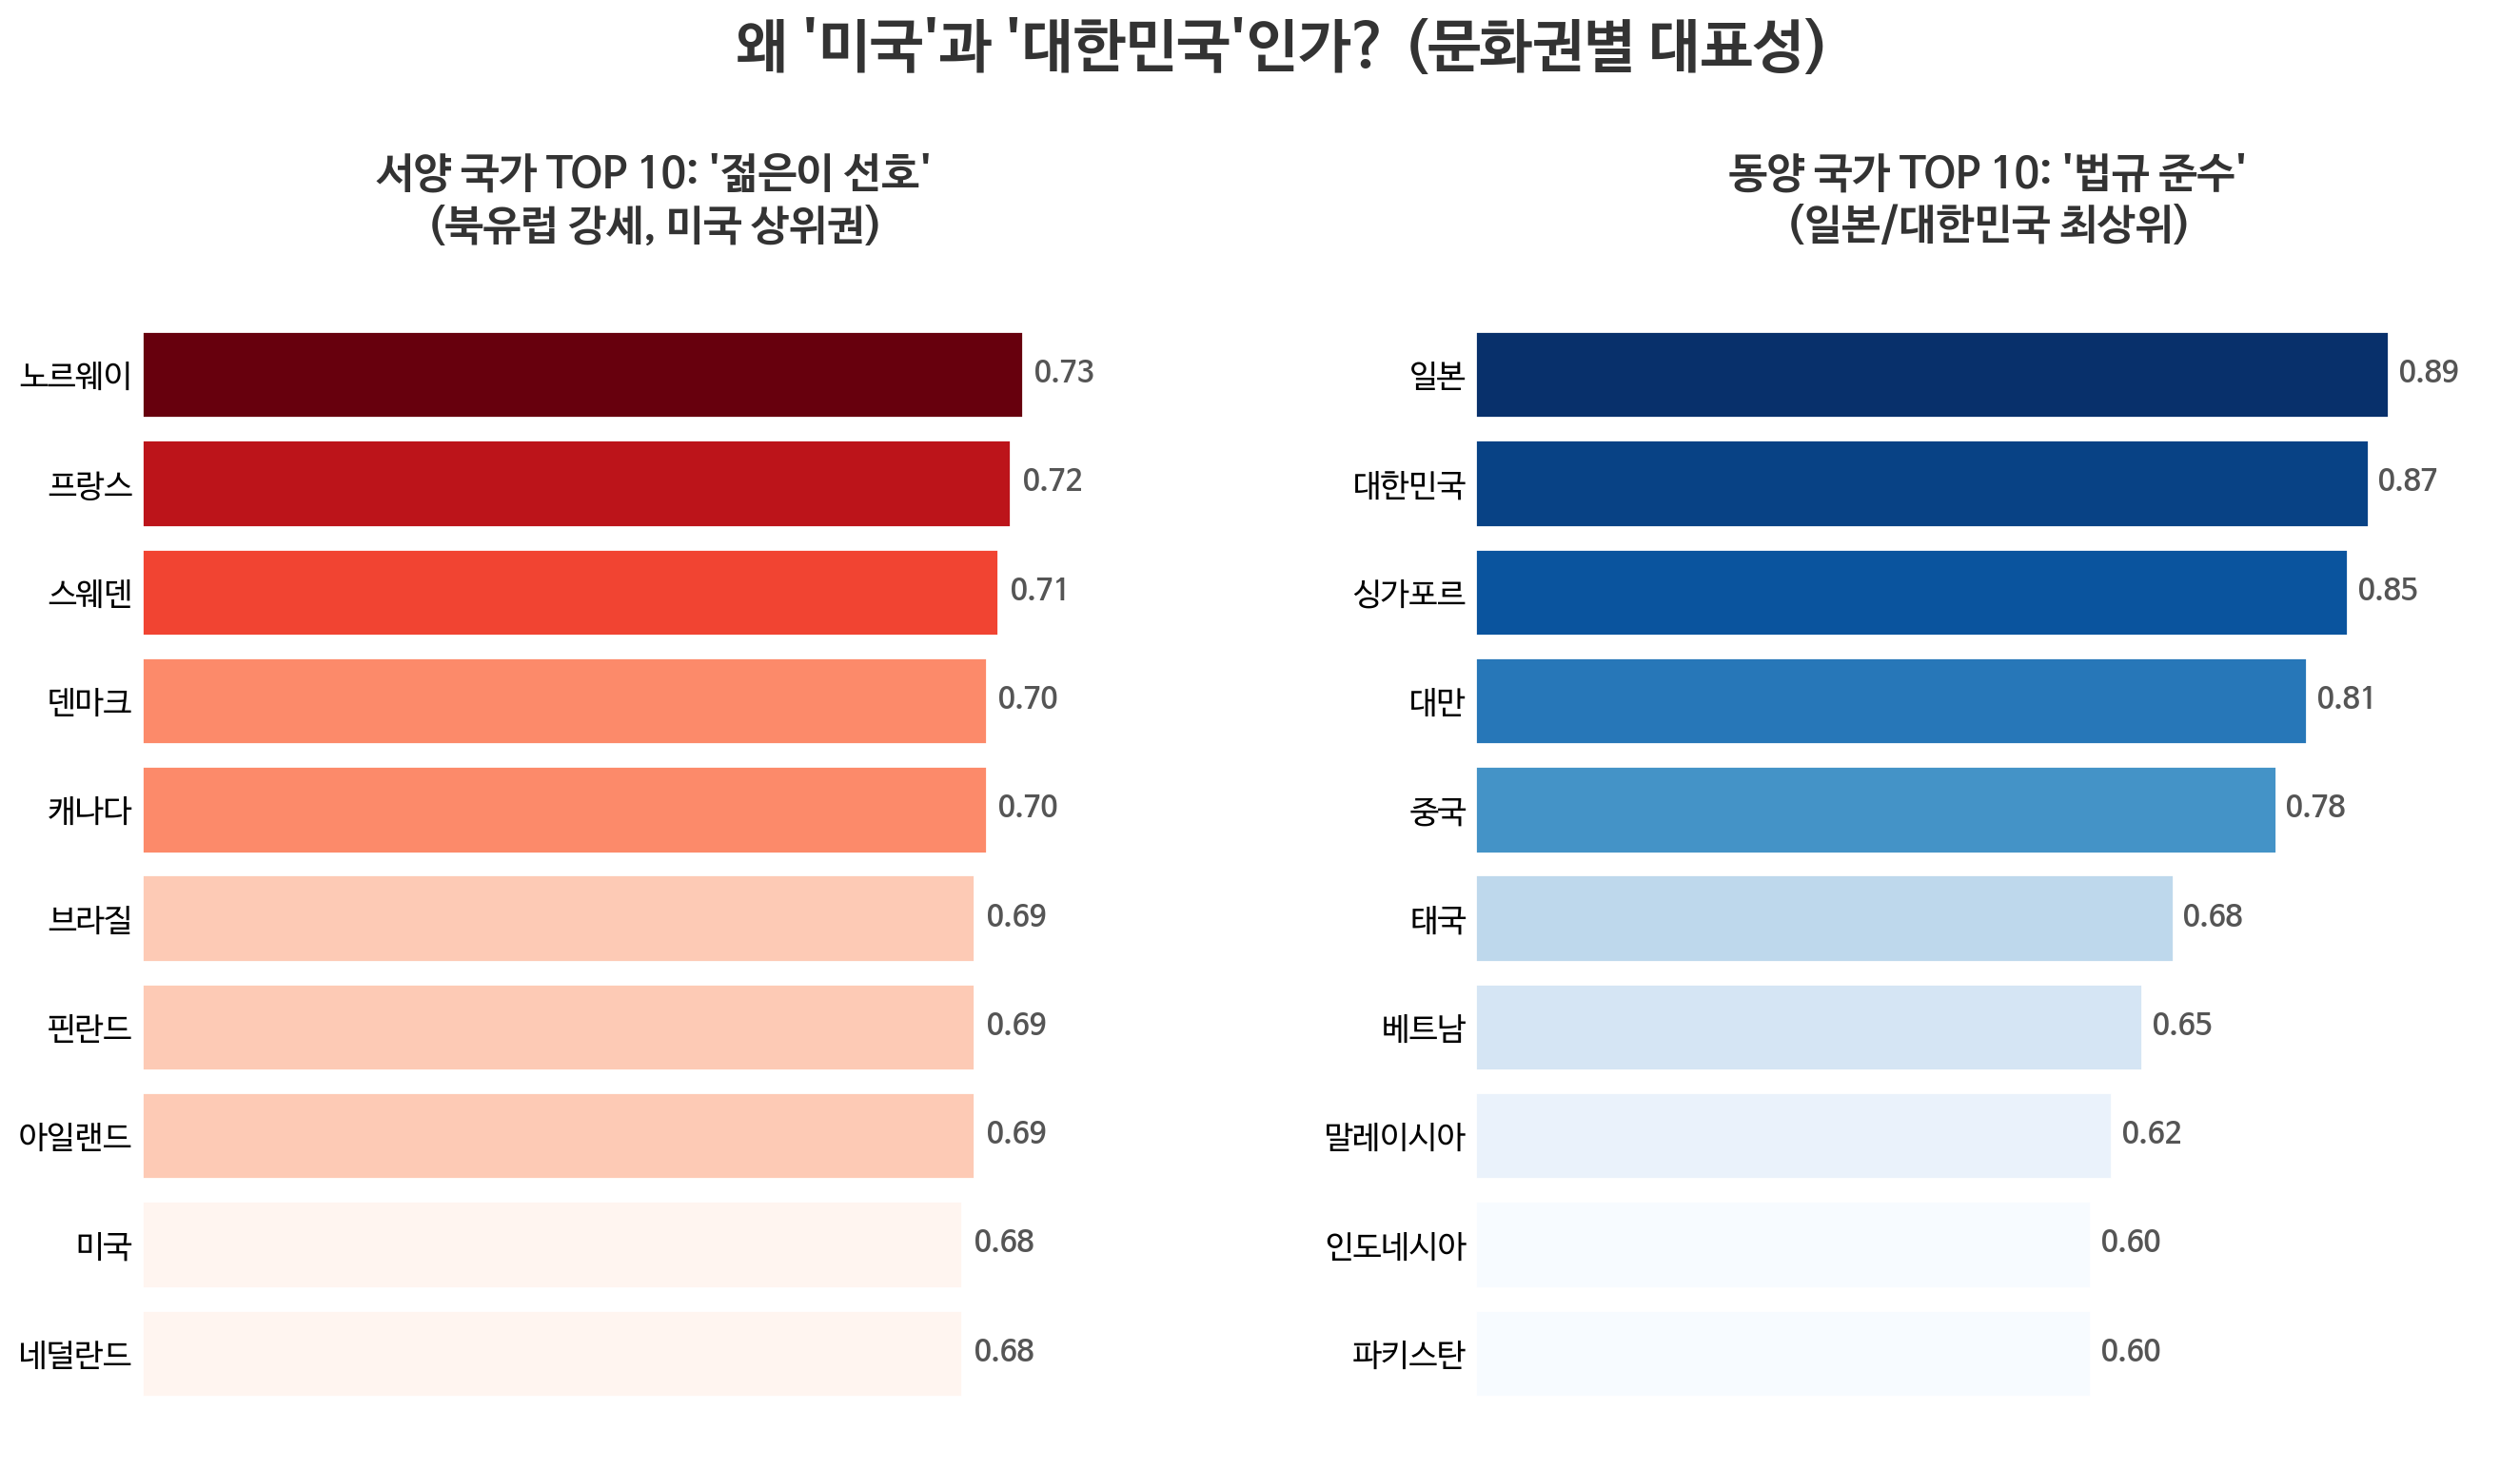

✅ [Part 4.5] 차트 디자인 완료! (한글 + 그라데이션)


In [3]:
# ==========================================
# [Part 4.5] 중간 분석: 진영별 TOP 10 (한글 + 그라데이션)
# ==========================================
print("⏳ 디자인이 개선된 챔피언 차트를 생성하고 있습니다...")
import matplotlib.pyplot as plt
import matplotlib.cm as cm # 컬러맵 사용

# 1. 데이터 준비
asian_countries = ['KOR', 'JPN', 'CHN', 'TWN', 'SGP', 'VNM', 'THA', 'IDN', 'PHL', 'MYS', 'IND', 'PAK']
asian_mask = df['ISO3'].isin(asian_countries)

df_asia = df[asian_mask].copy()
df_west = df[~asian_mask].copy()

# 2. 시각화 설정
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plt.subplots_adjust(wspace=0.3)

# ---------------------------------------------------------
# [왼쪽 차트] 서양: '젊은이 선호' TOP 10
# ---------------------------------------------------------
top_west = df_west.sort_values(by='save_young', ascending=False).head(10)
countries = top_west['Country'] # 한글 이름
values = top_west['save_young']

# ★ 색상 그라데이션 설정 (Reds)
# 수치가 높을수록 진한 빨강
norm = plt.Normalize(values.min(), values.max())
colors = cm.Reds(norm(values))

axes[0].barh(countries, values, color=colors, edgecolor='white')
axes[0].set_title(f"서양 국가 TOP 10: '젊은이 선호'\n(북유럽 강세, 미국 상위권)", fontsize=16, fontweight='bold', pad=15)
axes[0].invert_yaxis() # 1위가 맨 위로

# 디자인
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].set_xticks([])
axes[0].tick_params(axis='y', length=0, labelsize=12)

# 수치 표시
for i, v in enumerate(values):
    axes[0].text(v + 0.01, i, f'{v:.2f}', va='center', fontsize=11, fontweight='bold', color='#555555')
axes[0].set_xlim(0, 0.85)


# ---------------------------------------------------------
# [오른쪽 차트] 동양: '법규 준수' TOP 10
# ---------------------------------------------------------
top_asia = df_asia.sort_values(by='compliance', ascending=False).head(10)
countries = top_asia['Country']
values = top_asia['compliance']

# ★ 색상 그라데이션 설정 (Blues)
# 수치가 높을수록 진한 파랑
norm = plt.Normalize(values.min(), values.max())
colors = cm.Blues(norm(values))

axes[1].barh(countries, values, color=colors, edgecolor='white')
axes[1].set_title(f"동양 국가 TOP 10: '법규 준수'\n(일본/대한민국 최상위)", fontsize=16, fontweight='bold', pad=15)
axes[1].invert_yaxis()

# 디자인
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].set_xticks([])
axes[1].tick_params(axis='y', length=0, labelsize=12)

# 수치 표시
for i, v in enumerate(values):
    axes[1].text(v + 0.01, i, f'{v:.2f}', va='center', fontsize=11, fontweight='bold', color='#555555')
axes[1].set_xlim(0, 1.0)

# 전체 제목
fig.suptitle("왜 '미국'과 '대한민국'인가? (문화권별 대표성)", fontsize=22, fontweight='bold', y=1.05)

# 저장 및 출력
plt.savefig("moral_machine_champions.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ [Part 4.5] 차트 디자인 완료! (한글 + 그라데이션)")

⏳ 디자인이 개선된 버터플라이 차트를 생성하고 있습니다...


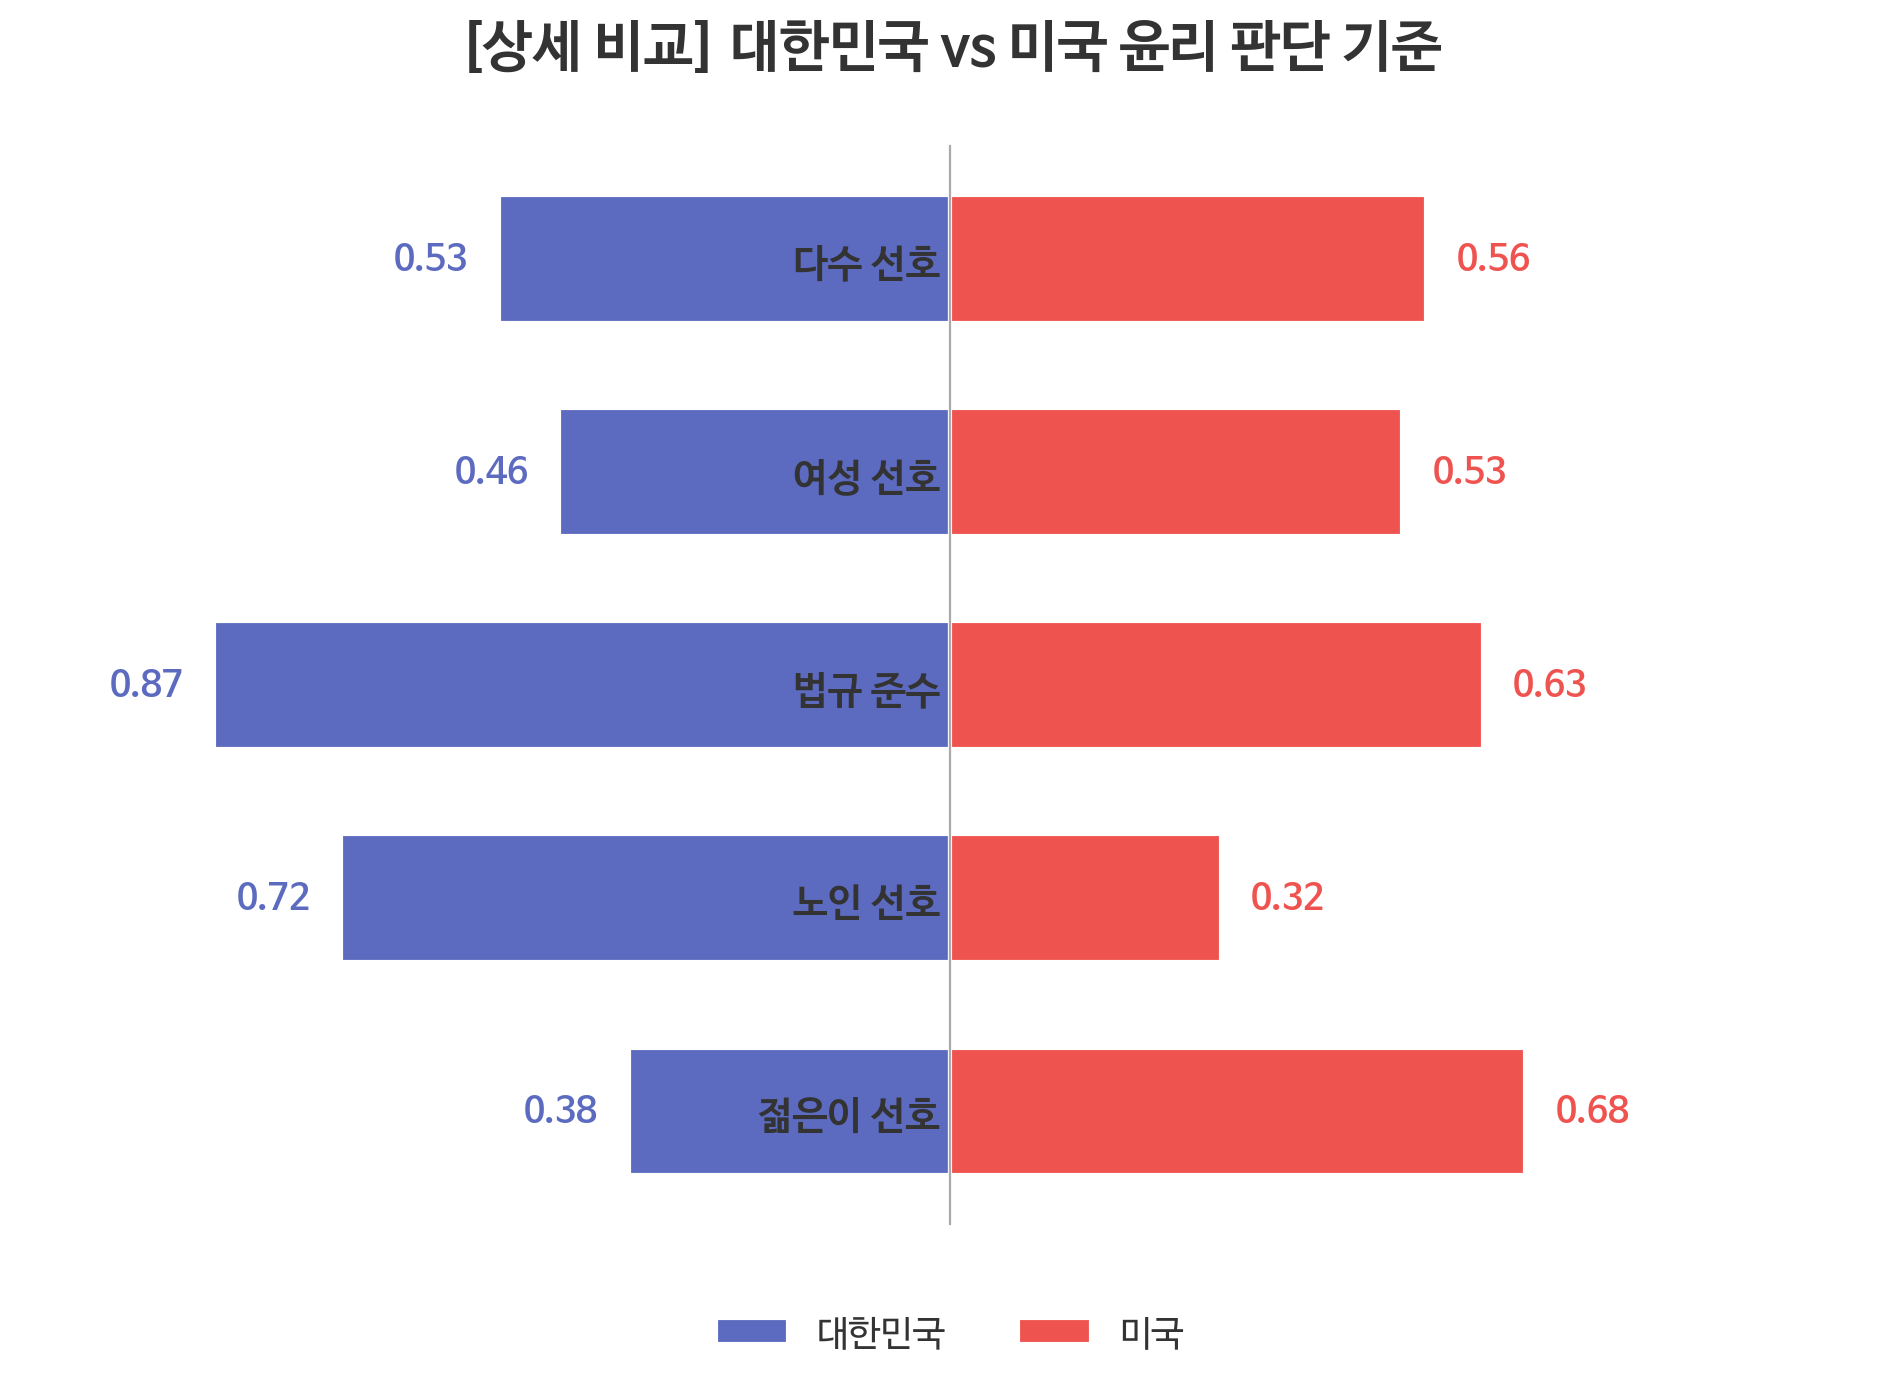

✅ [Part 5] 디자인 차트 완료! 'moral_machine_butterfly_design.png'가 자동 저장되었습니다.


In [4]:
# ==========================================
# [Part 5] 미시 분석: 버터플라이 차트 (Design Upgraded)
# ==========================================
print("⏳ 디자인이 개선된 버터플라이 차트를 생성하고 있습니다...")

# 1. 데이터 준비
target_cols = ['save_young', 'save_elderly', 'compliance', 'save_female', 'save_many']
labels = ['젊은이 선호', '노인 선호', '법규 준수', '여성 선호', '다수 선호']
kor_values = df[df['ISO3'] == 'KOR'][target_cols].values.flatten().tolist()
usa_values = df[df['ISO3'] == 'USA'][target_cols].values.flatten().tolist()

# 2. 디자인 설정 (색상 변경)
color_kor = '#5C6BC0' # 세련된 인디고 블루
color_usa = '#EF5350' # 세련된 코랄 레드
text_color = '#333333' # 진한 회색

# 3. 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 7)) # 크기 조금 키움
y = np.arange(len(labels))
height = 0.6 # 막대 두께 조절

# 막대 그리기 (테두리 추가로 선명하게)
ax.barh(y, [-x for x in kor_values], height, color=color_kor, label='대한민국', edgecolor='white', linewidth=1.5)
ax.barh(y, usa_values, height, color=color_usa, label='미국', edgecolor='white', linewidth=1.5)

# 4. 꾸미기 (핵심 UI 개선)
# 불필요한 테두리(Spine) 제거
for spine in ['top', 'right', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_position('zero') # 왼쪽 축을 중앙으로 이동
ax.spines['left'].set_color('#AAAAAA') # 중앙선 색상 변경

# 격자무늬 추가 (세로선만)
ax.grid(axis='x', linestyle='--', alpha=0.7, color='lightgray')

# X축 눈금 및 라벨 제거
ax.set_xticks([])

# Y축 라벨 설정 (글자 크기 키우고 진하게)
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=14, fontweight='bold', color=text_color)
ax.tick_params(axis='y', length=0) # Y축 눈금 선 제거

# 5. 수치 표시 (Annotation) - 글씨 진하게, 색상 매칭
for i, (k, u) in enumerate(zip(kor_values, usa_values)):
    # 한국 수치 (왼쪽)
    ax.text(-k - 0.08, i, f'{k:.2f}', ha='center', va='center', color=color_kor, fontweight='bold', fontsize=13)
    # 미국 수치 (오른쪽)
    ax.text(u + 0.08, i, f'{u:.2f}', ha='center', va='center', color=color_usa, fontweight='bold', fontsize=13)

# 6. 제목 및 범례
plt.title('[상세 비교] 대한민국 vs 미국 윤리 판단 기준', fontsize=20, pad=30, fontweight='bold', color=text_color)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=13, frameon=False) # 범례 테두리 제거
plt.xlim(-1.1, 1.1) # 좌우 여백 확보

# 이미지 파일 저장
plt.savefig("moral_machine_butterfly_design.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ [Part 5] 디자인 차트 완료! 'moral_machine_butterfly_design.png'가 자동 저장되었습니다.")